In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,shapiro
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.describe(include="object")


,Gender
count,200
unique,2
top,Female
freq,112


In [9]:
df.isna().sum().sum()

0

In [10]:
df.duplicated().sum()

0

In [11]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs(zscore(df[numeric_columns]))
threshold = 3
outliers = z_scores > threshold
outliers_count = outliers.sum(axis=0)
print(outliers_count)

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


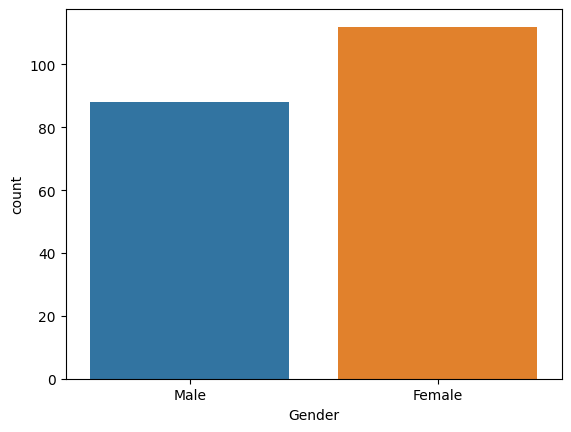

In [16]:
sns.countplot(x="Gender",data=df)
plt.show()

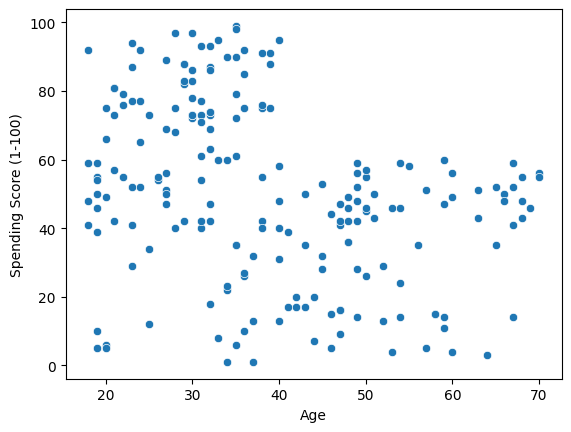

In [17]:
sns.scatterplot(x="Age",y="Spending Score (1-100)",data=df)
plt.show()

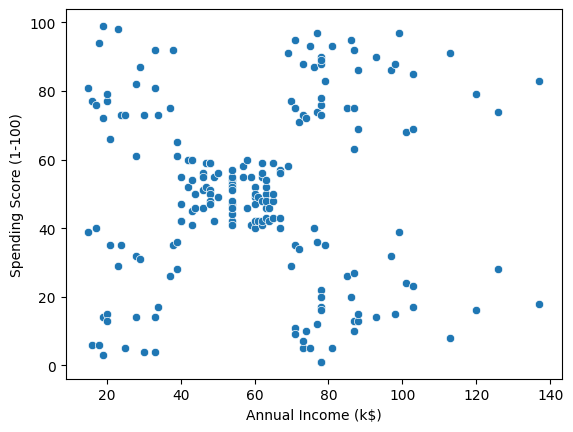

In [18]:
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df)
plt.show()

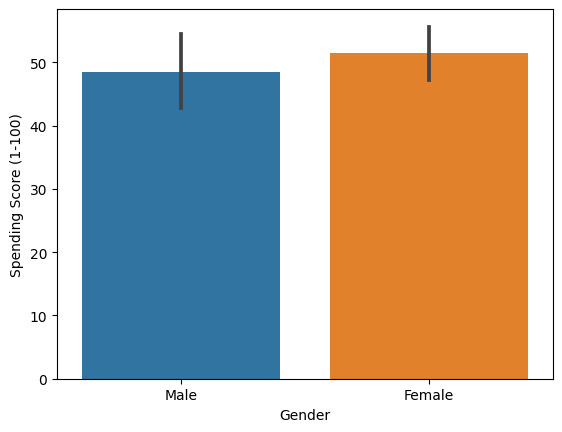

In [14]:
sns.barplot(x="Gender",y="Spending Score (1-100)",data=df,)
plt.show()

In [40]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]

In [41]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

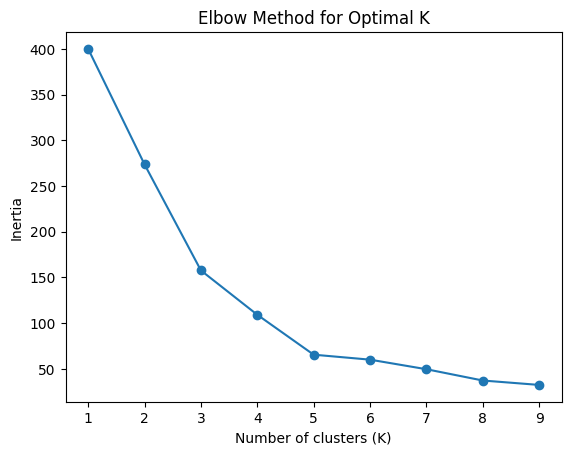

In [42]:
inertia = []
K_range = range(1, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [43]:
kmeans = KMeans(n_clusters=5, random_state=42)  
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [44]:
df['Cluster'] = kmeans.labels_

In [45]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


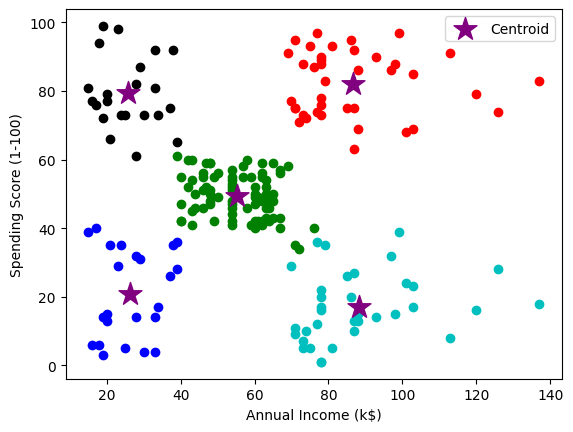

In [53]:
# Suppose you used StandardScaler
df1 = df[df.Cluster==0] 
df2 = df[df.Cluster==1] 
df3 = df[df.Cluster==2]
df4 = df[df.Cluster==3]
df5 = df[df.Cluster==4]

centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color='green')
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='red')
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color='black')
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color='c')
plt.scatter(df5['Annual Income (k$)'], df5['Spending Score (1-100)'], color='blue')

plt.scatter(
    centroids_original[:, 0], centroids_original[:, 1],
    color='purple', marker='*', s=300, label='Centroid'
)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
